<a href="https://colab.research.google.com/github/hiramaral/redesneurais/blob/main/hcca_rnn_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as bibliotecas necessárias

In [35]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

Biblioteca mlxtend

[mlxtend](http://rasbt.github.io/mlxtend/)

In [36]:
!pip install mlxtend

In [37]:
from mlxtend.plotting import plot_decision_regions

Base de dados - 

[Wine](https://archive.ics.uci.edu/ml/datasets/wine)

[scikit-learn](https://archive.ics.uci.edu/ml/datasets/wine)

Carregando base de dados

In [38]:
wine = datasets.load_wine()

Criando o Dataframe

In [39]:
df_wine = pd.DataFrame(data=wine.data,columns=wine.feature_names)

In [40]:
df_wine['class'] = wine.target

Verificando os dados

In [41]:
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Informações da Base de Dados

In [42]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [43]:
df_wine['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

Quando usar o Algoritmo KNN

- Pode ser utilizado para tarefas de Classificação e Regressão.
- Simplicidade e Fácil interpretação.
- Arquitetura Lazy ("treinamento" rápido).
- Flexibilidade de Métodos de Distância.
- Rápido tempo de predição.
-Nenhuma suposição quanto a distribuição dos dados.

Como funciona o KNN ?

- Aplicando o KNN na Base de Dados Wine Separando os dados de treino e teste.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_wine.drop('class',axis=1), df_wine['class'], test_size=0.3)

Instanciando o Classificador.

In [46]:
from sklearn.neighbors import KNeighborsClassifier

Alguns parametros interessantes:

- n_neighbors: Número de vizinhos (Default=5).
- weights: Peso de amostras vizinhas (Default=uniform).
- metric: Métrica utilizada para o cálculo de distância (Default=minkowski).
p: Parametro de poder para a métrica (Default=2).
- n_jobs: Número de jobs paralelos para executar no momento da busca de vizinhos. (Default=1) 

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)

Treinando o algoritmo com os dados de treinamento.

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Executando o KNN com o conjunto de teste

In [49]:
resultado = knn.predict(X_test)
resultado

array([1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1, 1,
       0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2,
       0, 0, 2, 1, 1, 0, 1, 0, 1, 0])

Metricas de classificação

In [50]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado,target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       0.76      0.95      0.84        20
     class_1       0.79      0.75      0.77        20
     class_2       0.60      0.43      0.50        14

    accuracy                           0.74        54
   macro avg       0.72      0.71      0.70        54
weighted avg       0.73      0.74      0.73        54



Otimizando o Parametro K utilizando GridSearch

In [52]:
from sklearn.model_selection import GridSearchCV

Definindo a lista de valores para os parametros

In [53]:
k_list = list(range(1,31))
weight_list = ['uniform','distance']
p_list = [1,2]

In [54]:
parametros = dict(n_neighbors=k_list)

In [55]:
parametros

{'n_neighbors': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30]}

Instânciando o objeto GridSearch

In [56]:
grid = GridSearchCV(knn, parametros, cv=5, scoring='accuracy')

Treinando o objeto

In [57]:
grid.fit(df_wine.drop('class',axis=1),df_wine['class'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

Verificando os valores de scores

In [58]:
grid.cv_results_

{'mean_fit_time': array([0.00345426, 0.00260344, 0.0025671 , 0.00257173, 0.00252137,
        0.00256338, 0.00261335, 0.00255857, 0.00269608, 0.00250921,
        0.00260653, 0.00251994, 0.00261617, 0.00257788, 0.00411358,
        0.00313807, 0.00255346, 0.00246339, 0.00252385, 0.00252361,
        0.00280523, 0.00260687, 0.00249667, 0.00281997, 0.00255494,
        0.00340433, 0.0025146 , 0.00255294, 0.00252924, 0.00249972]),
 'mean_score_time': array([0.00405788, 0.00408525, 0.00382075, 0.00394073, 0.00380478,
        0.00386329, 0.00385451, 0.00383415, 0.00399055, 0.00391197,
        0.00389419, 0.00395713, 0.00394793, 0.0039628 , 0.00576744,
        0.00412011, 0.00380278, 0.00375452, 0.00410867, 0.00371213,
        0.00414519, 0.00385952, 0.00368247, 0.00424433, 0.00375233,
        0.00505586, 0.0037724 , 0.00375347, 0.00382705, 0.00373073]),
 'mean_test_score': array([0.72507937, 0.66365079, 0.70285714, 0.68015873, 0.69126984,
        0.69142857, 0.68063492, 0.68015873, 0.70253968, 0

In [59]:
scores = grid.cv_results_.get('mean_test_score')

In [60]:
k_rank = grid.cv_results_.get('rank_test_score')

In [61]:
print("Melhores parametros {} com o valor de acurácia {} ".format(grid.best_params_,grid.best_score_))

Melhores parametros {'n_neighbors': 1} com o valor de acurácia 0.7250793650793651 


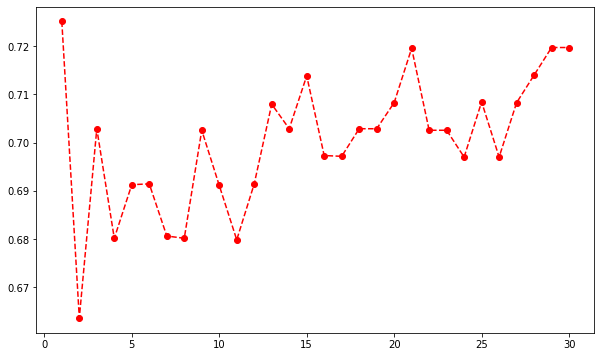

In [64]:
plt.figure(figsize=(10,6))
plt.plot(k_list,scores,color='red',linestyle='dashed',marker='o')

Visualizando as fronteiras de complexidade

- Selecionando os dados

In [62]:
X = wine.data[:,[0,2]]
y = wine.target

Função para plot de fronteiras de acordo com o número de vizinhos

In [63]:
def plot_fronteiras(n_vizinhos):
    knn = KNeighborsClassifier(n_neighbors=n_vizinhos)
    knn.fit(X, y)
    plt.figure(figsize=(8,5))
    plot_decision_regions(X,y,clf=knn,legend=2)
    plt.xlabel('alcohol')
    plt.ylabel('malic_acid')
    plt.title('Fronteiras de Complexidade - KNN')

Valor de K = 1

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


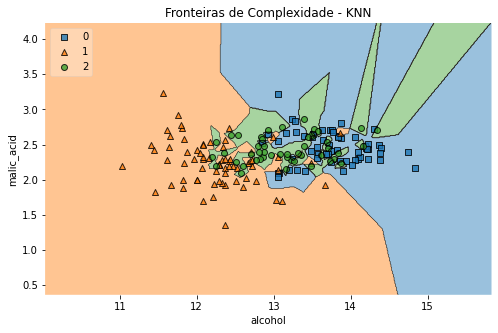

In [33]:
plot_fronteiras(1)

Valor de K = 3

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


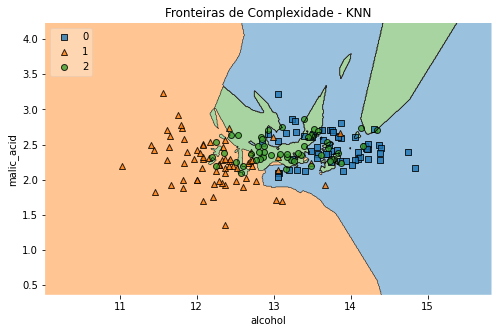

In [34]:
plot_fronteiras(3)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


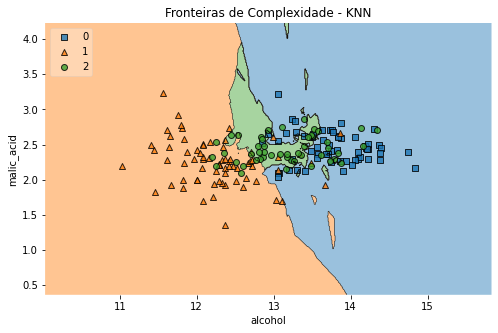

In [65]:
plot_fronteiras(7)

Valor de K = 20

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


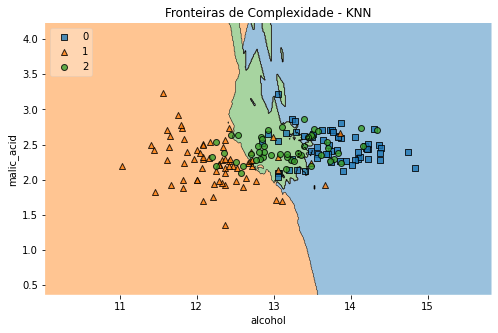

In [67]:
plot_fronteiras(20)

Valor de K = 30

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


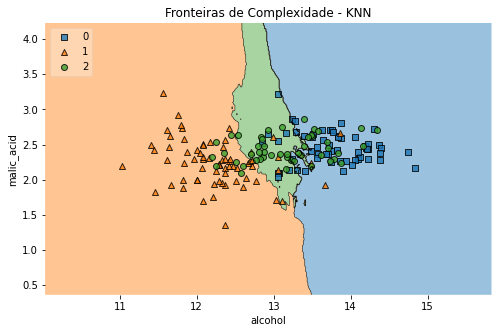

In [66]:
plot_fronteiras(30)